# Lab 5. MLP MNIST classification (2)

### 이번 실습은 저번 4주차 MLP MNIST classification에 이어 5주차 이론에서 배운 학습 방법들을 적용해 모델을 학습시켜 봅니다.

### 다양한 MNIST dataset을 torchvision에서 load 하여 classification을 진행하며, torch에서 지원하는 여러 종류의 optimizer, lr scheduler, 그리고 regularization 기법들을 적용해 봅니다.

### MLP의 구조, optimizer, scheduler의 종류와 다른 기법에 따른 학습 속도와 성능 변화를 비교해보고 dropout과 batch normalization이 어떠한 효과를 가지는 지 실험을 하며 비교해 봅니다.

### 이번 실습에서 사용할 패키지들은 다음과 같습니다.

- os
- numpy
- pytorch
- torchvision
- matplotlib


### Drive mount and package import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 5-1. Data Prepare

In [ ]:
# mnist 데이터 다운
root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "data")
root

'/content/drive/MyDrive/Colab Notebooks/data'

### 5-1-1. MNIST

In [ ]:
# 트레인과 테스트 구분
mnist_train = datasets.MNIST(
    root=root, 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
mnist_test = datasets.MNIST(
    root=root, 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

In [ ]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
sample_x, sample_y = mnist_train[0]
print(sample_x.shape)# 체널이 하나인 흑백 이미지
print(sample_y)

torch.Size([1, 28, 28])
5


In [ ]:
# targets.unique()를 하면 그 종류를 확인 가능
mnist_train.targets.shape, mnist_train.targets.unique()

(torch.Size([60000]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
def plot_mnist(data, figsize=(20, 10)):# figsize는 가로 세로
  fig = plt.figure(figsize=figsize)
  for i in range(18):
    img = data[i][0]
    ax = fig.add_subplot(3, 6, i+1)# subplot은 행과 열!
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {data[i][1]}")# 각각의 그림위에 label이 뭔지 타이틀을 적어줌!
  fig.show()
  pass

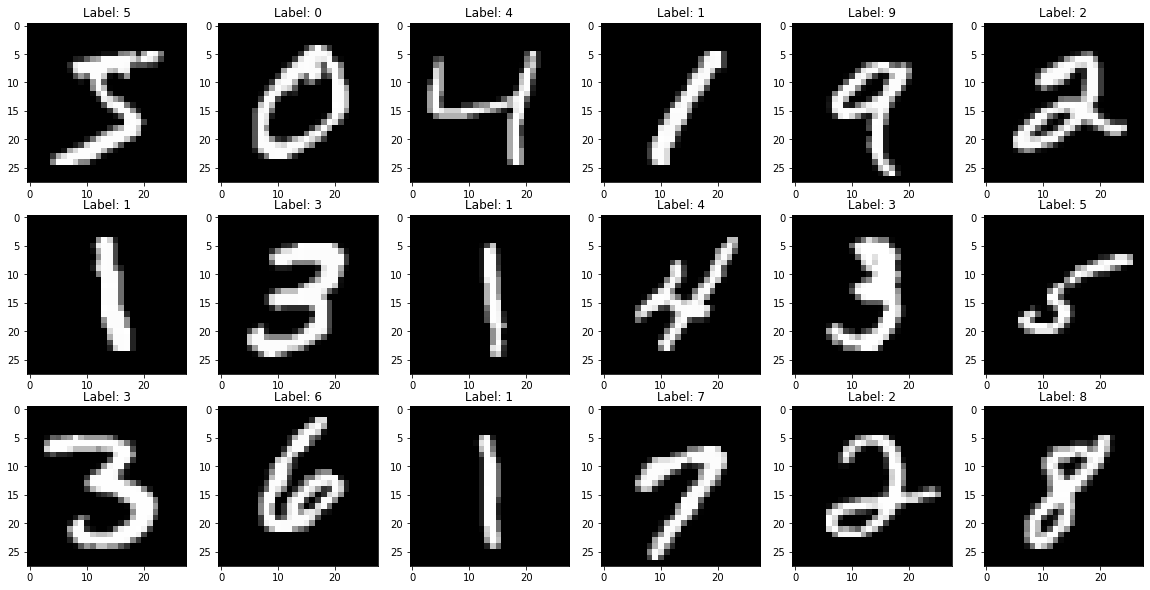

In [ ]:
plot_mnist(data=mnist_train)

### 5-1-2. Fashion MNIST

In [ ]:
fmnist_train = datasets.FashionMNIST(
    root=root, 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
fmnist_test = datasets.FashionMNIST(
    root=root, 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

In [ ]:
fmnist_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
fmnist_train.targets.shape, fmnist_train.targets.unique()

(torch.Size([60000]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

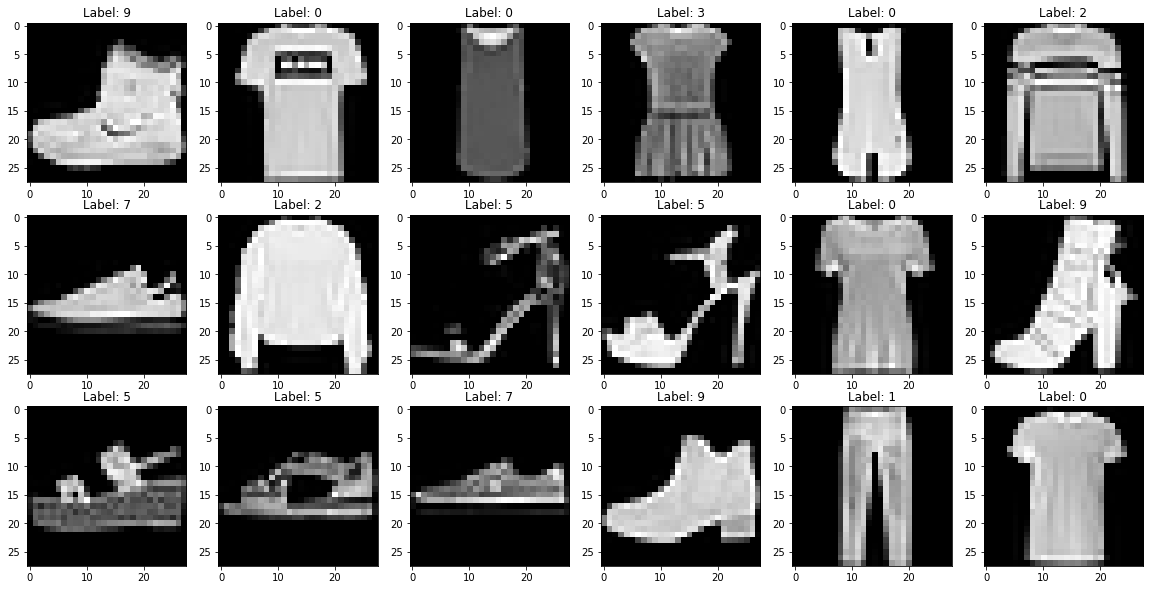

In [ ]:
plot_mnist(data=fmnist_train)

### 5-1-3. KMNIST

In [ ]:
kmnist_train = datasets.KMNIST(
    root=root, 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
kmnist_test = datasets.KMNIST(
    root=root, 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/KMNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/KMNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/KMNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/data/KMNIST/raw



In [ ]:
kmnist_train

Dataset KMNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
kmnist_train.targets.shape, kmnist_train.targets.unique()

(torch.Size([60000]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

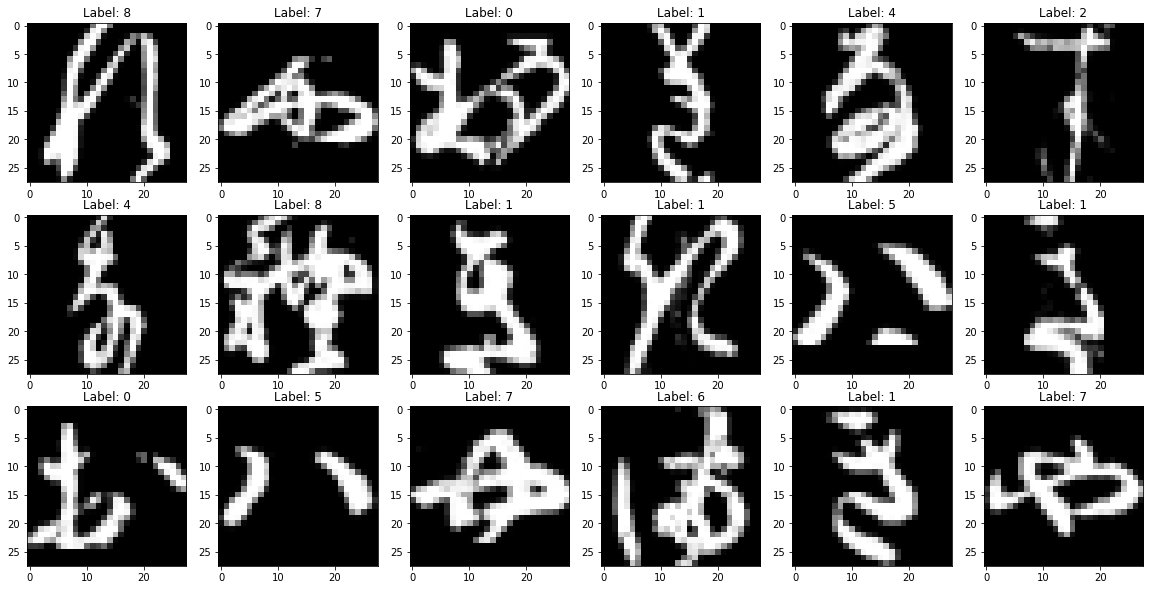

In [ ]:
plot_mnist(data=kmnist_train)

### 5-1-4. EMNIST

In [ ]:
emnist_train = datasets.EMNIST(
    root=root,
    split="byclass",
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
emnist_test = datasets.EMNIST(
    root=root,
    split="byclass",
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/EMNIST/raw/gzip.zip to /content/drive/MyDrive/Colab Notebooks/data/EMNIST/raw


In [ ]:
emnist_train

Dataset EMNIST
    Number of datapoints: 697932
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
emnist_train.targets.shape, emnist_train.targets.unique()

(torch.Size([697932]),
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61]))

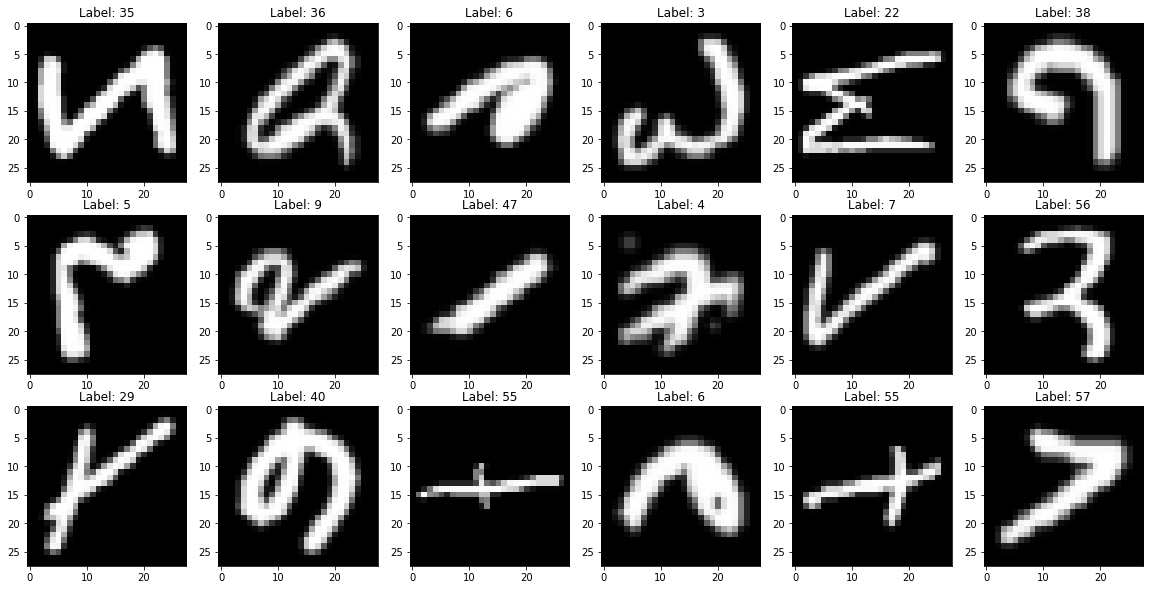

In [ ]:
plot_mnist(data=emnist_train)

### 5-1-5. Train-valid split

In [ ]:
#학습에 참여하지 않는 데이터 셋을 때어내어 validation 셋으로 활용
class mnist_dataset(Dataset):
  def __init__(self, data, targets, transform=None, target_transform=None):
    super().__init__()
    # 내부 객체 변수 지정
    self.data = data
    self.targets = targets
    self.transform = transform
    self.target_transform = target_transform
    pass

  def __len__(self):
    #데이터셋의 길이: 로더에서 몇번 돌아야 데이터셋을 한번 사용한건지 알기 위해서!
    return len(self.data)

  def __getitem__(self, idx):
    # 인덱스를 받아서 transform이 필요하면 transform을 취함 => totensor를 얻음
    x, y = self.data[idx], self.targets[idx]

    if self.transform:
      x = self.transform(x)
    if self.target_transform:
      y = self.target_transform(y)

    return x, y

In [ ]:
def split_train_valid(dataset, valid_ratio=0.1):
  #전체 데이터 숫자 확인
  n_valid = int(len(dataset) * valid_ratio) # => valid 데이터 셋의 size

  # 트레인과 벨리드 데이터를 나누고 타켓 데이터도 나누기
  train_data = dataset.data[:-n_valid].numpy()# totensor로 사용하기 위해 numpy로 변경
  valid_data = dataset.data[-n_valid:].numpy()
  train_targets = dataset.targets[:-n_valid]
  valid_targets = dataset.targets[-n_valid:]

  train = mnist_dataset(data=train_data, targets=train_targets, transform=dataset.transform, target_transform=dataset.target_transform)
  valid = mnist_dataset(data=valid_data, targets=valid_targets, transform=dataset.transform, target_transform=dataset.target_transform)

  return train, valid

In [ ]:
mnist_train, mnist_valid = split_train_valid(dataset=mnist_train)
fmnist_train, fmnist_valid = split_train_valid(dataset=fmnist_train)
kmnist_train, kmnist_valid = split_train_valid(dataset=kmnist_train)
emnist_train, emnist_valid = split_train_valid(dataset=emnist_train) #, valid_ratio=0.05)

In [ ]:
mnists = {}# 딕션너리로 각각을 나누어줌
mnists["mnist"] = {"train": mnist_train, "valid": mnist_valid, "test": mnist_test}
mnists["fmnist"] = {"train": fmnist_train, "valid": fmnist_valid, "test": fmnist_test}
mnists["kmnist"] = {"train": kmnist_train, "valid": kmnist_valid, "test": kmnist_test}
mnists["emnist"] = {"train": emnist_train, "valid": emnist_valid, "test": emnist_test}

for k in mnists.keys(): # 벨리드는 10%를 사용하였음으로 6000
  print(f"Length of {k}: train - {len(mnists[k]['train'])}, valid - {len(mnists[k]['valid'])}, test - {len(mnists[k]['test'])}.")

Length of mnist: train - 54000, valid - 6000, test - 10000.
Length of fmnist: train - 54000, valid - 6000, test - 10000.
Length of kmnist: train - 54000, valid - 6000, test - 10000.
Length of emnist: train - 628139, valid - 69793, test - 116323.


In [ ]:
mnists

{'emnist': {'test': Dataset EMNIST
      Number of datapoints: 116323
      Root location: /content/drive/MyDrive/Colab Notebooks/data
      Split: Test
      StandardTransform
  Transform: ToTensor(),
  'train': <__main__.mnist_dataset at 0x7f5716137290>,
  'valid': <__main__.mnist_dataset at 0x7f5716137390>},
 'fmnist': {'test': Dataset FashionMNIST
      Number of datapoints: 10000
      Root location: /content/drive/MyDrive/Colab Notebooks/data
      Split: Test
      StandardTransform
  Transform: ToTensor(),
  'train': <__main__.mnist_dataset at 0x7f5716137e50>,
  'valid': <__main__.mnist_dataset at 0x7f5716137690>},
 'kmnist': {'test': Dataset KMNIST
      Number of datapoints: 10000
      Root location: /content/drive/MyDrive/Colab Notebooks/data
      Split: Test
      StandardTransform
  Transform: ToTensor(),
  'train': <__main__.mnist_dataset at 0x7f5716137490>,
  'valid': <__main__.mnist_dataset at 0x7f5716137710>},
 'mnist': {'test': Dataset MNIST
      Number of datapoin

In [ ]:
loaders = {}
# batch size 는 emnist는 512 로 나머지는 64로!
# train data는 shuffle을 하는것이 학습에 유리!
# drop_last는 epoch 평균을 낼때 사이즈에 맞지 않는 부분은 버리고 코드를 간결하게 하기 위해!
for k in mnists.keys():
  loaders[k] = {s: DataLoader(dataset=mnists[k][s], batch_size=512 if k == "emnist" else 64, shuffle= s == "train", drop_last=True) for s in ["train", "valid", "test"]}

In [ ]:
loaders

{'emnist': {'test': <torch.utils.data.dataloader.DataLoader at 0x7f5716137450>,
  'train': <torch.utils.data.dataloader.DataLoader at 0x7f5716137590>,
  'valid': <torch.utils.data.dataloader.DataLoader at 0x7f5716137dd0>},
 'fmnist': {'test': <torch.utils.data.dataloader.DataLoader at 0x7f5716137a90>,
  'train': <torch.utils.data.dataloader.DataLoader at 0x7f5716137a50>,
  'valid': <torch.utils.data.dataloader.DataLoader at 0x7f5716137a10>},
 'kmnist': {'test': <torch.utils.data.dataloader.DataLoader at 0x7f57161373d0>,
  'train': <torch.utils.data.dataloader.DataLoader at 0x7f5716137150>,
  'valid': <torch.utils.data.dataloader.DataLoader at 0x7f5716137950>},
 'mnist': {'test': <torch.utils.data.dataloader.DataLoader at 0x7f5716c7c3d0>,
  'train': <torch.utils.data.dataloader.DataLoader at 0x7f5716c7cdd0>,
  'valid': <torch.utils.data.dataloader.DataLoader at 0x7f5716c7cc10>}}

## 5-2. Model Build


In [ ]:
class LionMNISTClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()
    #Sequential을 이용해서 순서대로 진행 되게함
    
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
#LionMNISTClassifier() 처럼 ()가 있으면 객체를 생성
mlp = LionMNISTClassifier()
mlp

LionMNISTClassifier(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)

## 5-3. Trainer

In [ ]:
class Trainer(nn.Module):
  def __init__(self, model_class, loaders, n_class=10, opt="sgd", lr=0.001, has_scheduler=False, device="cpu"):
    super().__init__()
    # 모델 객체()가 아닌 모델 클래스를 입력 받음
    
    self.model = model_class(n_class=n_class)
    self.loss = nn.CrossEntropyLoss()
    # 로더 따로 정의
    self.train_loader = loaders["train"]
    self.valid_loader = loaders["valid"]
    self.test_loader = loaders["test"]
    #opt를 이용하여 정의
    self._get_optimizer(opt=opt.lower(), lr=lr)
    self.has_scheduler = has_scheduler
    if self.has_scheduler:
      self._get_scheduler()

    self.device = device
    pass
  # 어떤 최적하를 사용하는지에 따라 구분
  def _get_optimizer(self, opt, lr=0.001):
    if opt == "sgd":
      self.optimizer = torch.optim.SGD(params=self.model.parameters(), lr=lr)
    elif opt == "adam":
      self.optimizer = torch.optim.Adam(params=self.model.parameters(), lr=lr)
    else:
      raise ValueError(f"optimizer {opt} is not supproted")
  # steplr을 이용하여 epoch를 학습/ 만약 학습의 정확도를 엄청 높이고 싶다면 필요
  # gamma는 step_size의 epoch마다 gamma만큼 갱신한다는것!
  def _get_scheduler(self):
    self.scheduler = torch.optim.lr_scheduler.StepLR(optimizer=self.optimizer, step_size=5, gamma=0.5, verbose=True)

  def train(self, max_epochs=10):
    print("===== Train Start =====")
    # 히스토리 저장 디스토리
    history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
    for e in range(max_epochs):
      train_loss, train_acc = self._train_epoch()
      valid_loss, valid_acc = self._valid_epoch()

      history["train_loss"].append(train_loss)
      history["train_acc"].append(train_acc)
      history["valid_loss"].append(valid_loss)
      history["valid_acc"].append(valid_acc)

      if self.has_scheduler:
        self.scheduler.step()

      if e % 5 == 0:
        print(f"Epoch: {e}, train loss: {train_loss:>6f}, train acc: {train_acc:>3f}, valid loss: {valid_loss:>6f}, valid acc: {valid_acc:>3f}")

    self.plot_history(history)
  # 로더를 돌리면서 학습을 확인
  def _train_epoch(self):
    epoch_loss, epoch_acc = 0, 0
    # 
    self.model.train()
    for (x, y) in self.train_loader:
      x = x.to(self.device)
      y = y.to(self.device)

      y_hat = self.model(x)
      loss = self.loss(y_hat, y)

      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

      epoch_loss += loss.to("cpu").item()
      epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    epoch_loss /= len(self.train_loader)
    epoch_acc /= len(self.train_loader)

    return epoch_loss, epoch_acc
  
  def _valid_epoch(self):
    epoch_loss, epoch_acc = 0, 0
    # 
    self.model.eval()
    with torch.no_grad():
      for (x, y) in self.valid_loader:
        x = x.to(self.device)
        y = y.to(self.device)

        y_hat = self.model(x)
        loss = self.loss(y_hat, y)

        epoch_loss += loss.to("cpu").item()
        epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    epoch_loss /= len(self.valid_loader)
    epoch_acc /= len(self.valid_loader)

    return epoch_loss, epoch_acc
  #plot으로 history 보여주기
  def plot_history(self, history):
    fig = plt.figure(figsize=(20, 10))

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history["train_loss"], color="red", label="train loss")
    ax.plot(history["valid_loss"], color="blue", label="valid loss")
    ax.set_title("Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history["train_acc"], color="red", label="train acc")
    ax.plot(history["valid_acc"], color="blue", label="valid acc")
    ax.set_title("Acc")
    ax.legend()

    fig.show()
  
  def test(self):
    print("===== Test Start =====")
    epoch_loss, epoch_acc = 0, 0
    self.model.eval()
    with torch.no_grad():
      for (x, y) in self.test_loader:
        x = x.to(self.device)
        y = y.to(self.device)

        y_hat = self.model(x)
        loss = self.loss(y_hat, y)

        epoch_loss += loss.to("cpu").item()
        epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    epoch_loss /= len(self.test_loader)
    epoch_acc /= len(self.test_loader)

    print(f"Test loss: {epoch_loss:>6f}, Test acc: {epoch_acc:>3f}")

===== Train Start =====
Epoch: 0, train loss: 2.294383, train acc: 0.101386, valid loss: 2.277819, valid acc: 0.117944
Epoch: 5, train loss: 1.878142, train acc: 0.666796, valid loss: 1.746934, valid acc: 0.712534
Epoch: 10, train loss: 0.822842, train acc: 0.810665, valid loss: 0.706745, valid acc: 0.852151
Epoch: 15, train loss: 0.548201, train acc: 0.854259, valid loss: 0.461203, valid acc: 0.888945
Epoch: 20, train loss: 0.453450, train acc: 0.874703, valid loss: 0.376161, valid acc: 0.904234
Epoch: 25, train loss: 0.403523, train acc: 0.887381, valid loss: 0.332786, valid acc: 0.912802
Epoch: 30, train loss: 0.371908, train acc: 0.895018, valid loss: 0.305856, valid acc: 0.917507
Epoch: 35, train loss: 0.349984, train acc: 0.900727, valid loss: 0.287082, valid acc: 0.921035
Epoch: 40, train loss: 0.332616, train acc: 0.905323, valid loss: 0.272709, valid acc: 0.924059
Epoch: 45, train loss: 0.318300, train acc: 0.908826, valid loss: 0.261135, valid acc: 0.926915
===== Test Start =

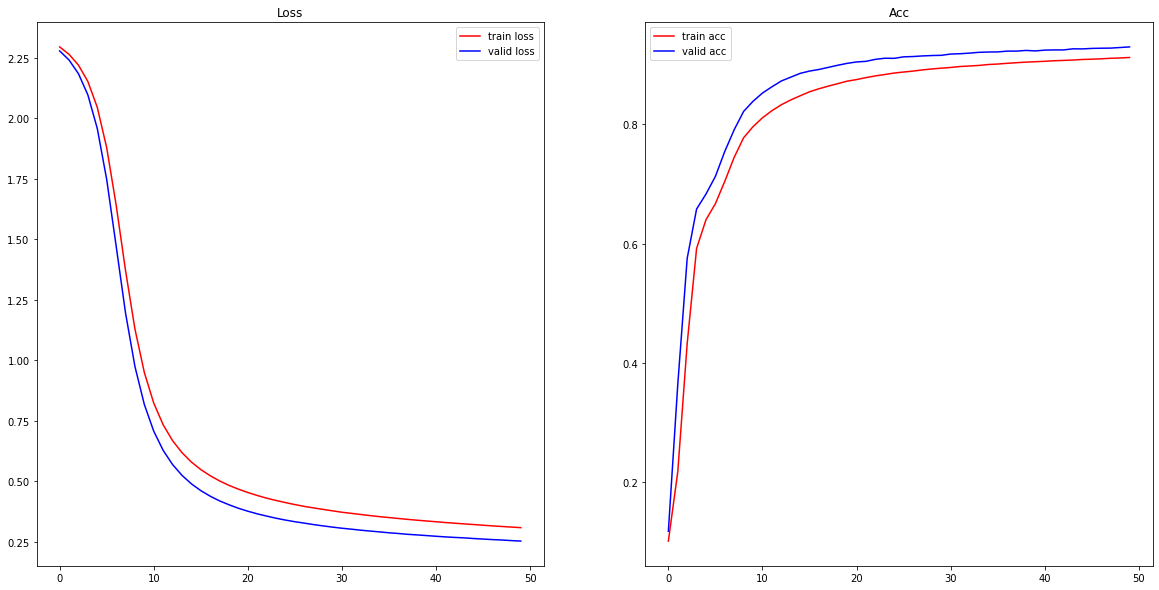

In [ ]:
trainer = Trainer(model_class=LionMNISTClassifier, loaders=loaders["mnist"], n_class=10, opt="sgd", lr=0.001, device=device).to(device)
trainer.train(max_epochs=50)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 0.305194, train acc: 0.911347, valid loss: 0.121987, valid acc: 0.962366
Epoch: 5, train loss: 0.031916, train acc: 0.989639, valid loss: 0.090336, valid acc: 0.977151
Epoch: 10, train loss: 0.014801, train acc: 0.995107, valid loss: 0.100113, valid acc: 0.979671
Epoch: 15, train loss: 0.010972, train acc: 0.996386, valid loss: 0.121013, valid acc: 0.978999
Epoch: 20, train loss: 0.009039, train acc: 0.997109, valid loss: 0.113787, valid acc: 0.982191
Epoch: 25, train loss: 0.008310, train acc: 0.997424, valid loss: 0.126098, valid acc: 0.979335
===== Test Start =====
Test loss: 0.127671, Test acc: 0.980168


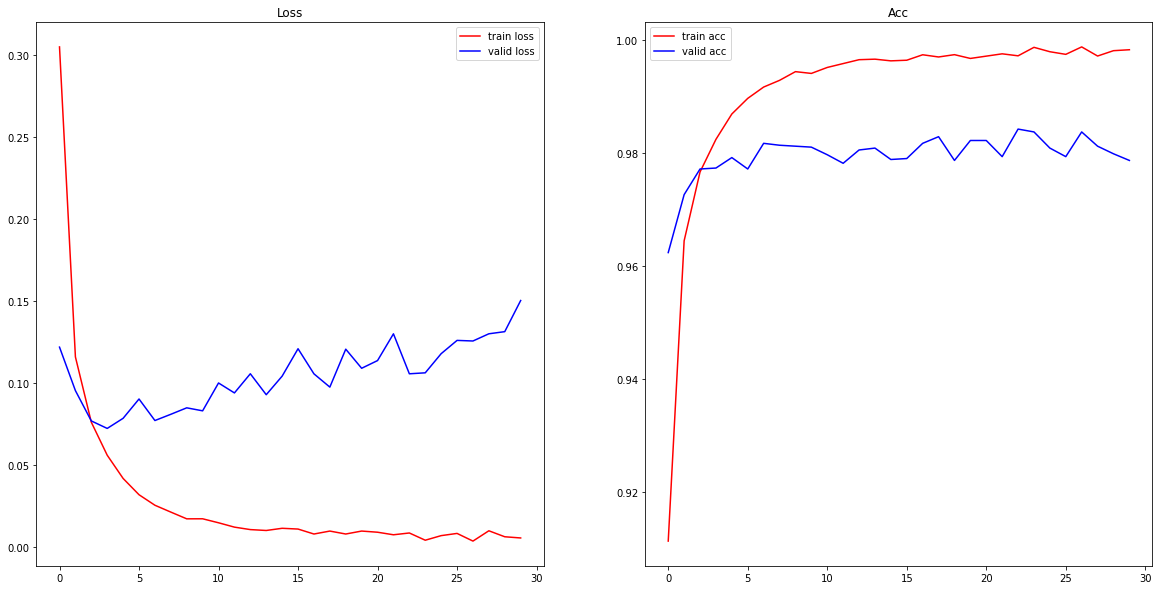

In [ ]:
# adam의경우 상승만 하는것이 왔다갔다 하는것이 특징
# 그렇다고 성능이 안좋은것이 아닌 epoch수가 적어도 학습성능이 상대적으로 높으며 속도가 빠름
trainer = Trainer(model_class=LionMNISTClassifier, loaders=loaders["mnist"], n_class=10, opt="adam", lr=0.001, device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

Adjusting learning rate of group 0 to 1.0000e-03.
===== Train Start =====
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 0, train loss: 0.297984, train acc: 0.916296, valid loss: 0.136256, valid acc: 0.960685
Adjusting learning rate of group 0 to 1.0000e-03.
Adjusting learning rate of group 0 to 1.0000e-03.
Adjusting learning rate of group 0 to 1.0000e-03.
Adjusting learning rate of group 0 to 5.0000e-04.
Adjusting learning rate of group 0 to 5.0000e-04.
Epoch: 5, train loss: 0.018247, train acc: 0.994680, valid loss: 0.069079, valid acc: 0.982191
Adjusting learning rate of group 0 to 5.0000e-04.
Adjusting learning rate of group 0 to 5.0000e-04.
Adjusting learning rate of group 0 to 5.0000e-04.
Adjusting learning rate of group 0 to 2.5000e-04.
Adjusting learning rate of group 0 to 2.5000e-04.
Epoch: 10, train loss: 0.002954, train acc: 0.999481, valid loss: 0.081439, valid acc: 0.983871
Adjusting learning rate of group 0 to 2.5000e-04.
Adjusting learning rate of group 0 to 2.

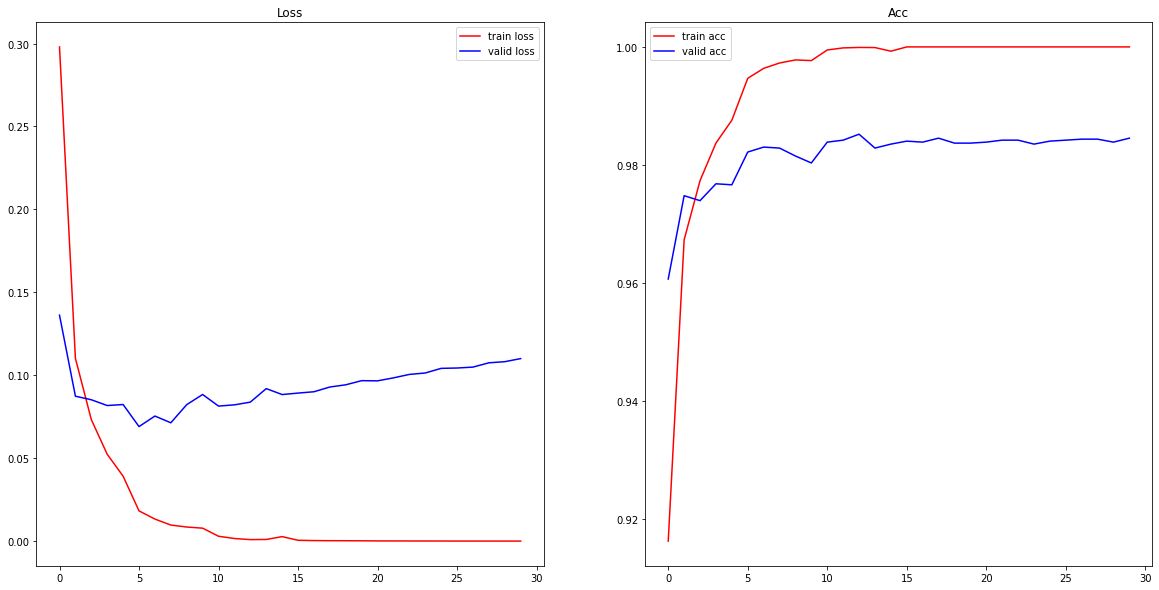

In [ ]:
# adam+scheduler 사용
trainer = Trainer(model_class=LionMNISTClassifier, loaders=loaders["mnist"], n_class=10, opt="adam", lr=0.001, has_scheduler=True, device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 0.534212, train acc: 0.809145, valid loss: 0.405957, valid acc: 0.850638
Epoch: 5, train loss: 0.273292, train acc: 0.897724, valid loss: 0.332989, valid acc: 0.884913
Epoch: 10, train loss: 0.220544, train acc: 0.915517, valid loss: 0.318535, valid acc: 0.891633
Epoch: 15, train loss: 0.182269, train acc: 0.930179, valid loss: 0.337749, valid acc: 0.888273
Epoch: 20, train loss: 0.153508, train acc: 0.940688, valid loss: 0.355879, valid acc: 0.890625
Epoch: 25, train loss: 0.130974, train acc: 0.949807, valid loss: 0.406132, valid acc: 0.892305
===== Test Start =====
Test loss: 0.450965, Test acc: 0.890725


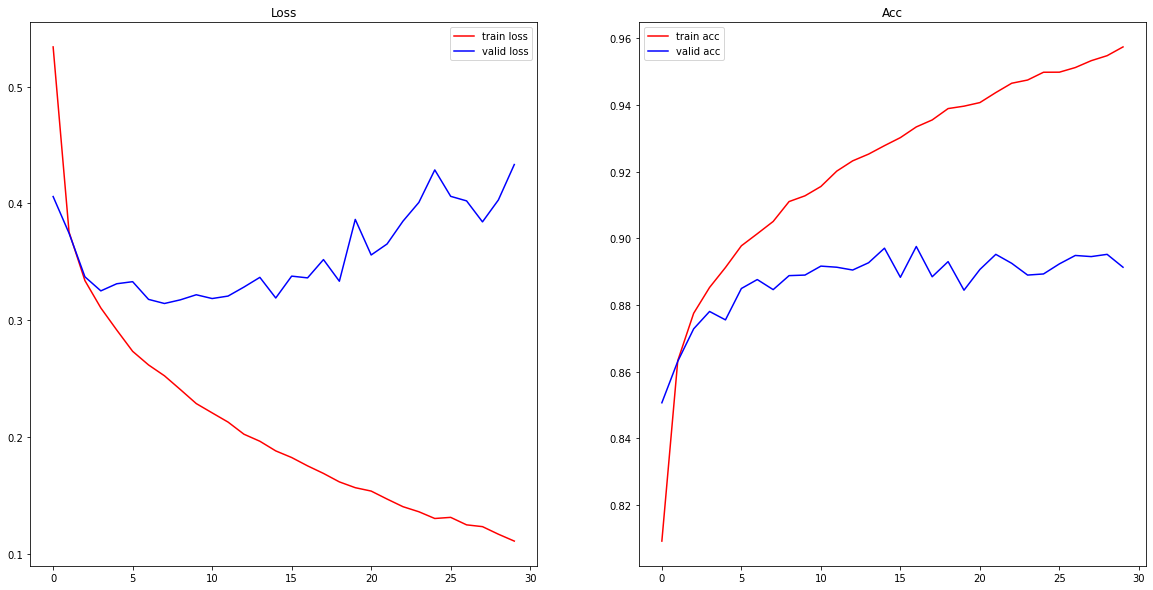

In [ ]:
#adam
trainer = Trainer(model_class=LionMNISTClassifier, loaders=loaders["fmnist"], n_class=10, opt="adam", lr=0.001, device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 0.435074, train acc: 0.869662, valid loss: 0.257732, valid acc: 0.922715
Epoch: 5, train loss: 0.042187, train acc: 0.986414, valid loss: 0.170165, valid acc: 0.954805
Epoch: 10, train loss: 0.019458, train acc: 0.993587, valid loss: 0.217593, valid acc: 0.957157
Epoch: 15, train loss: 0.011070, train acc: 0.996237, valid loss: 0.244010, valid acc: 0.961526
Epoch: 20, train loss: 0.014746, train acc: 0.995181, valid loss: 0.280163, valid acc: 0.959173
Epoch: 25, train loss: 0.007537, train acc: 0.997238, valid loss: 0.333281, valid acc: 0.956149
===== Test Start =====
Test loss: 0.780905, Test acc: 0.907352


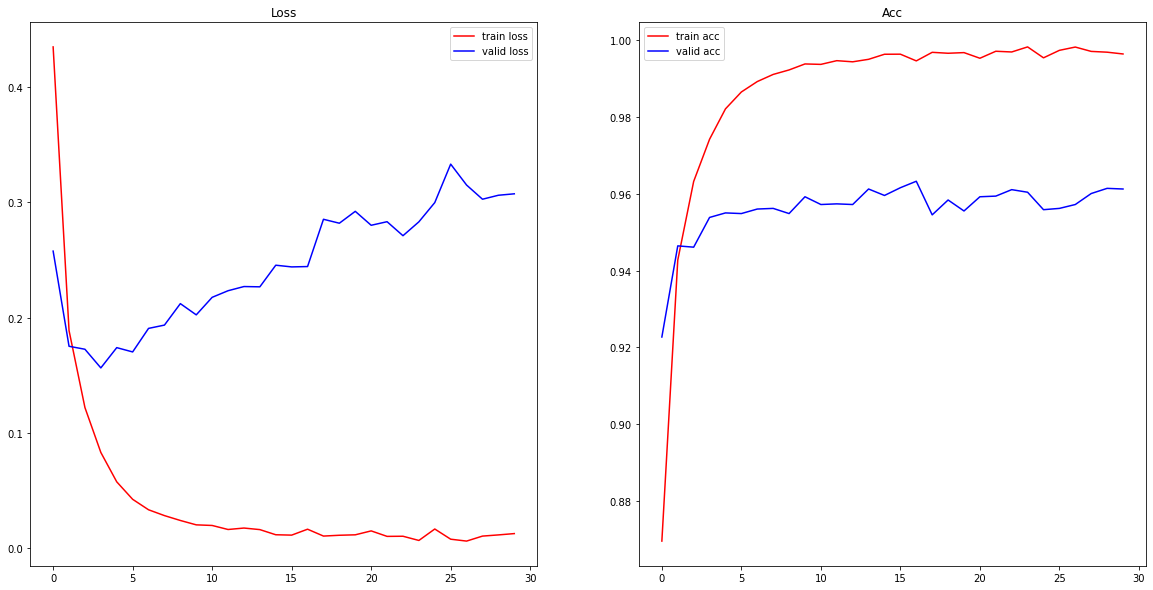

In [ ]:
#adam
trainer = Trainer(model_class=LionMNISTClassifier, loaders=loaders["kmnist"], n_class=10, opt="adam", lr=0.001, device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 0.869262, train acc: 0.745332, valid loss: 0.589637, valid acc: 0.809728
===== Test Start =====
Test loss: 0.453233, Test acc: 0.840050


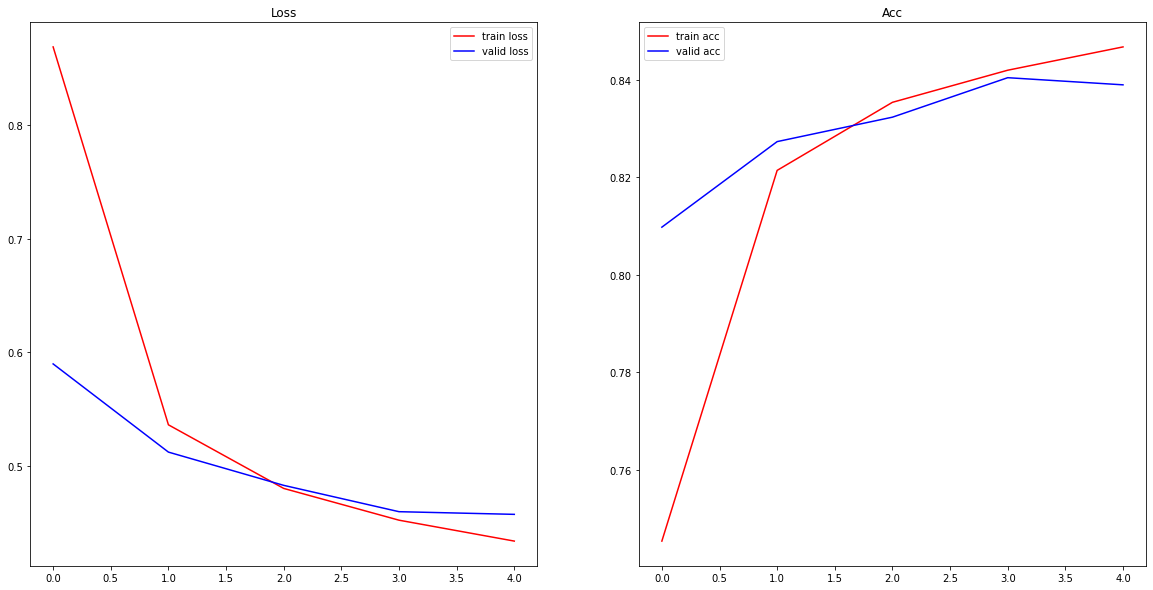

In [ ]:
trainer = Trainer(model_class=LionMNISTClassifier, loaders=loaders["emnist"], n_class=62, opt="adam", lr=0.001, device=device).to(device)
trainer.train(max_epochs=5)
trainer.test()

Start short training dataset mnist with adam optimizer
===== Train Start =====
Epoch: 0, train loss: 0.301607, train acc: 0.914072, valid loss: 0.110487, valid acc: 0.968414
Epoch: 5, train loss: 0.031498, train acc: 0.989991, valid loss: 0.081446, valid acc: 0.976815
Epoch: 10, train loss: 0.012664, train acc: 0.995830, valid loss: 0.079958, valid acc: 0.984543
===== Test Start =====
Test loss: 0.099947, Test acc: 0.981070
Start short training dataset fmnist with adam optimizer
===== Train Start =====
Epoch: 0, train loss: 0.529957, train acc: 0.811629, valid loss: 0.390495, valid acc: 0.859375
Epoch: 5, train loss: 0.275466, train acc: 0.896890, valid loss: 0.316329, valid acc: 0.887937
Epoch: 10, train loss: 0.218431, train acc: 0.918224, valid loss: 0.317736, valid acc: 0.891801
===== Test Start =====
Test loss: 0.346004, Test acc: 0.889423
Start short training dataset kmnist with adam optimizer
===== Train Start =====
Epoch: 0, train loss: 0.445917, train acc: 0.865751, valid loss

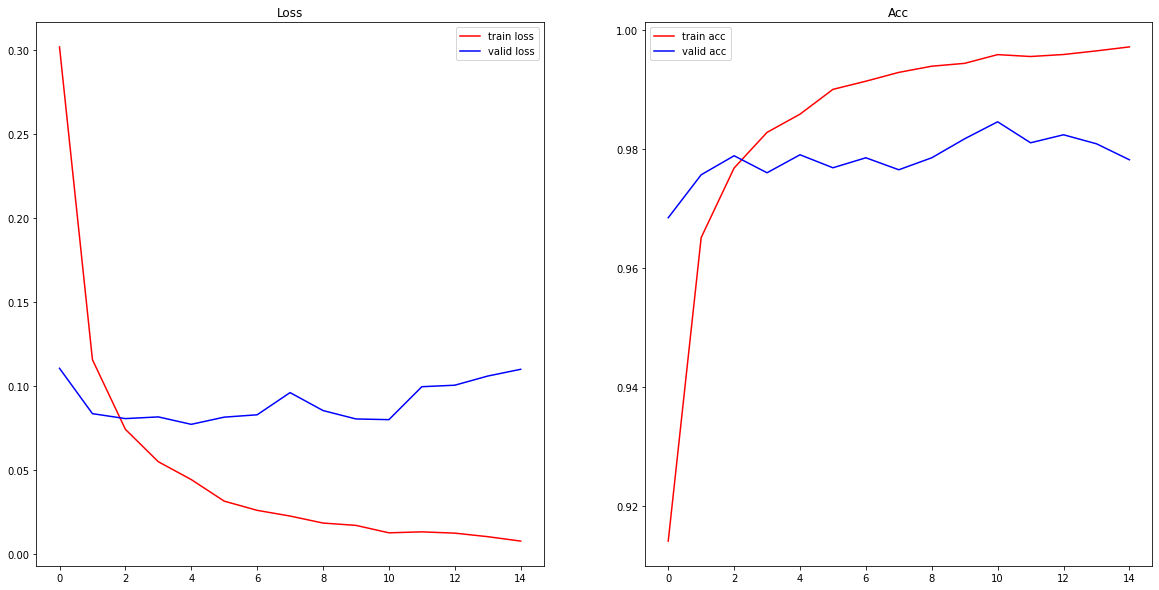

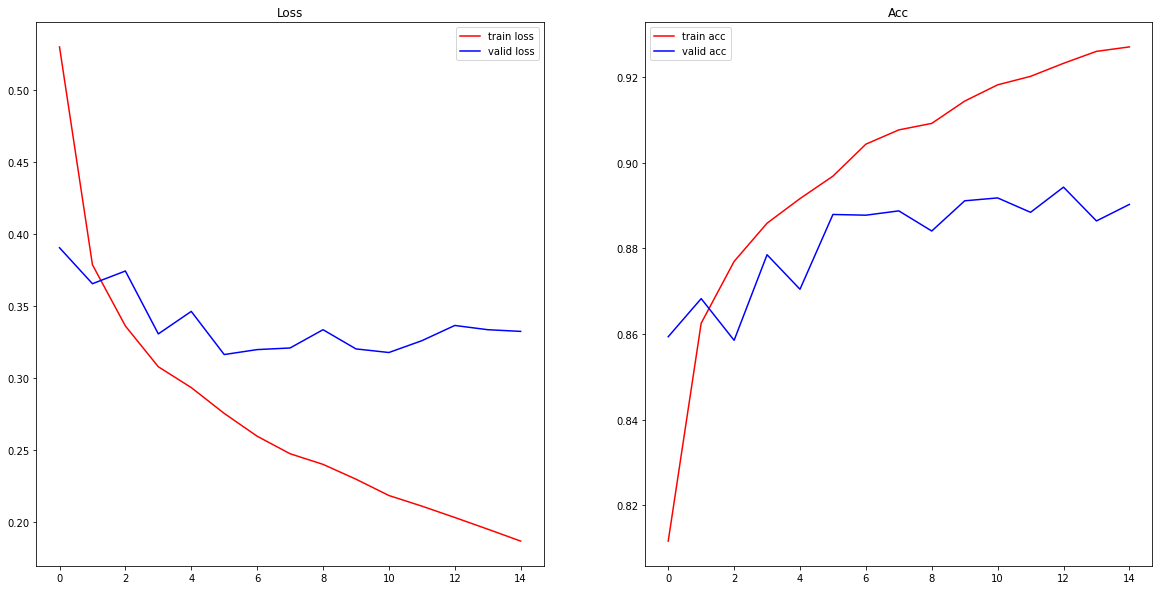

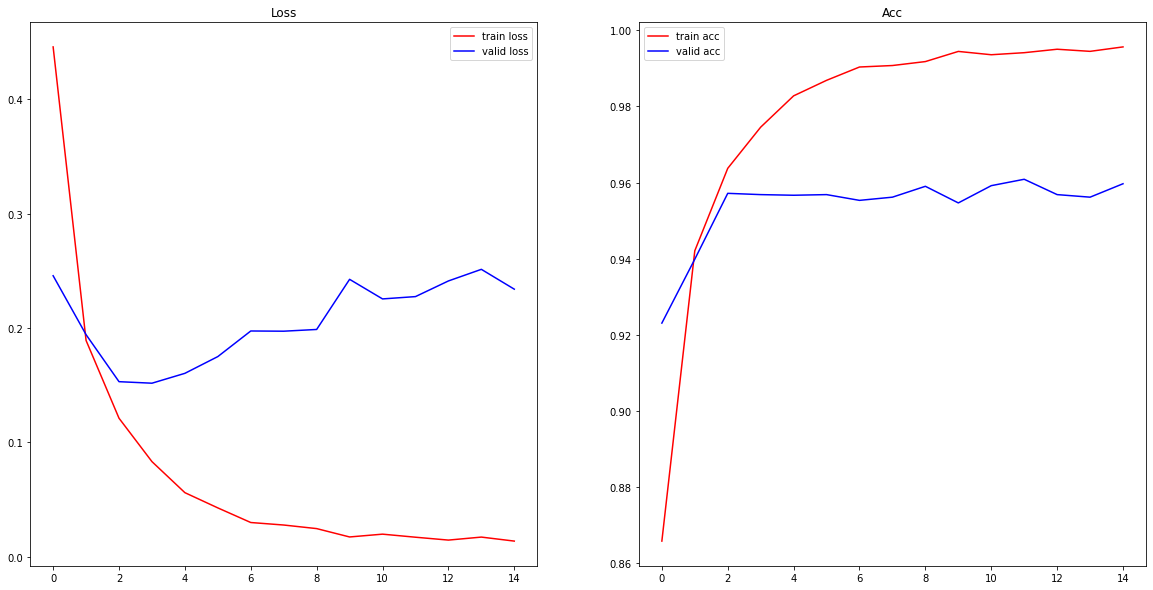

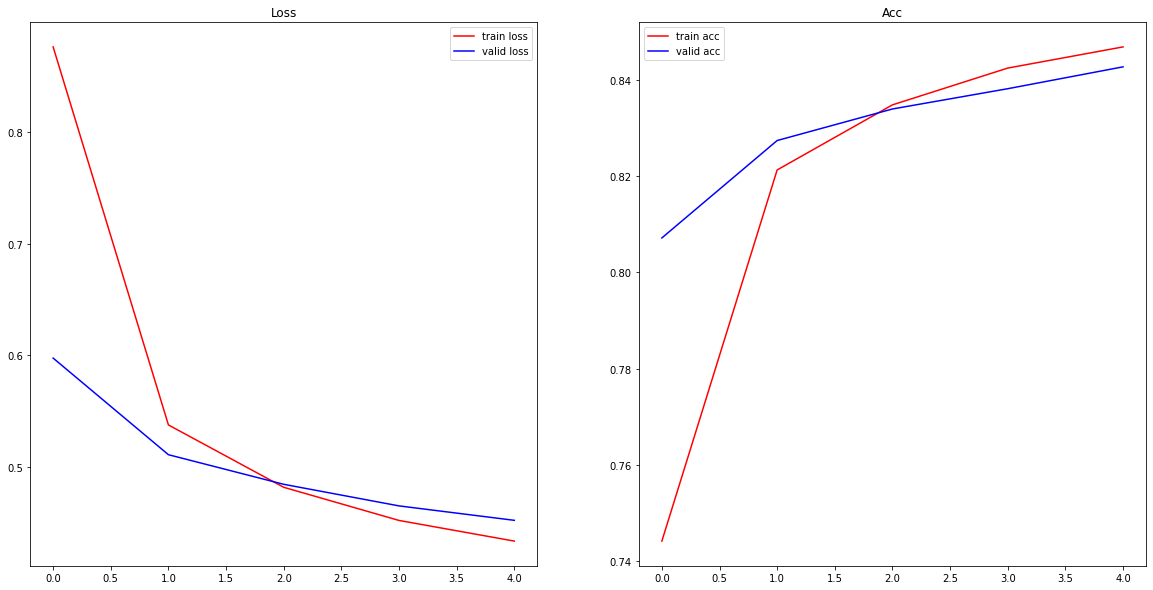

In [ ]:
table = {"mnist": 10, "fmnist": 10, "kmnist": 10, "emnist": 62}
for d_name in ["mnist", "fmnist", "kmnist", "emnist"]:
  print(f"Start short training dataset {d_name} with adam optimizer")
  trainer = Trainer(model_class=LionMNISTClassifier, loaders=loaders[d_name], n_class=table[d_name], opt="adam", lr=0.001, device=device).to(device)
  trainer.train(max_epochs = 15 if d_name != "emnist" else 5)
  trainer.test()

## 5-4. Model with dropout and batch normalization

In [ ]:
class LionMNISTDropoutClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(256, 128),
        #dropout 추가
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

class LionMNISTBNClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        #batch
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

class LionMNISTDropoutBNClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        nn.BatchNorm1d(256),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

===== Train Start =====
Epoch: 0, train loss: 0.697921, train acc: 0.748258, valid loss: 0.438066, valid acc: 0.834341
Epoch: 5, train loss: 0.403152, train acc: 0.855742, valid loss: 0.366425, valid acc: 0.867608
Epoch: 10, train loss: 0.365120, train acc: 0.868772, valid loss: 0.328547, valid acc: 0.878696
Epoch: 15, train loss: 0.346617, train acc: 0.874444, valid loss: 0.314703, valid acc: 0.882728
Epoch: 20, train loss: 0.331363, train acc: 0.878095, valid loss: 0.317373, valid acc: 0.879368
Epoch: 25, train loss: 0.320408, train acc: 0.882599, valid loss: 0.317782, valid acc: 0.884241
===== Test Start =====
Test loss: 0.334250, Test acc: 0.880208


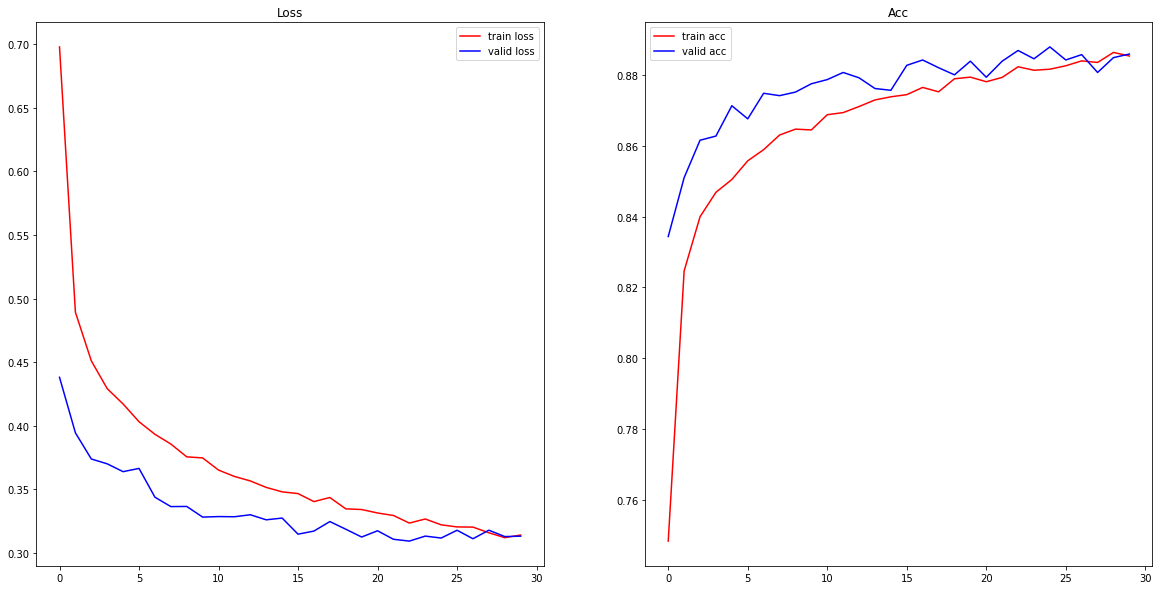

In [ ]:
#dropout을 하여서 그냥 adam만 했을때 와 달리 오버피팅이 사라진 모습!
trainer = Trainer(model_class=LionMNISTDropoutClassifier, loaders=loaders["fmnist"], n_class=10, opt="adam", lr=0.001, device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 0.454805, train acc: 0.838838, valid loss: 0.393057, valid acc: 0.856519
Epoch: 5, train loss: 0.237700, train acc: 0.911366, valid loss: 0.320120, valid acc: 0.884073
Epoch: 10, train loss: 0.171205, train acc: 0.936054, valid loss: 0.327236, valid acc: 0.889953
Epoch: 15, train loss: 0.130648, train acc: 0.950623, valid loss: 0.411154, valid acc: 0.869624
Epoch: 20, train loss: 0.105842, train acc: 0.959538, valid loss: 0.387270, valid acc: 0.890793
Epoch: 25, train loss: 0.079675, train acc: 0.969510, valid loss: 0.438311, valid acc: 0.887937
===== Test Start =====
Test loss: 0.434915, Test acc: 0.892628


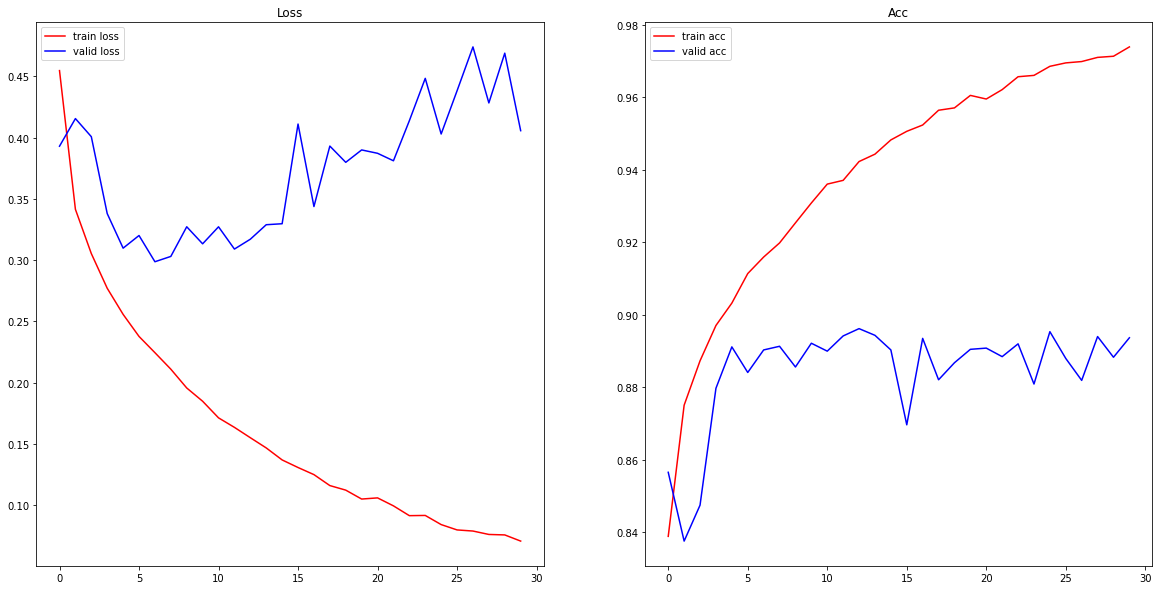

In [ ]:
#batch nomal 이경우는 그냥 adam 처럼 오버피팅이 됨
trainer = Trainer(model_class=LionMNISTBNClassifier, loaders=loaders["fmnist"], n_class=10, opt="adam", lr=0.001, device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 0.624363, train acc: 0.787941, valid loss: 0.411157, valid acc: 0.846438
Epoch: 5, train loss: 0.388208, train acc: 0.861655, valid loss: 0.330505, valid acc: 0.881216
Epoch: 10, train loss: 0.341396, train acc: 0.877762, valid loss: 0.304210, valid acc: 0.889281
Epoch: 15, train loss: 0.316281, train acc: 0.884305, valid loss: 0.304147, valid acc: 0.890961
Epoch: 20, train loss: 0.297810, train acc: 0.890866, valid loss: 0.294394, valid acc: 0.893649
Epoch: 25, train loss: 0.282483, train acc: 0.898354, valid loss: 0.285648, valid acc: 0.897849
===== Test Start =====
Test loss: 0.303693, Test acc: 0.892728


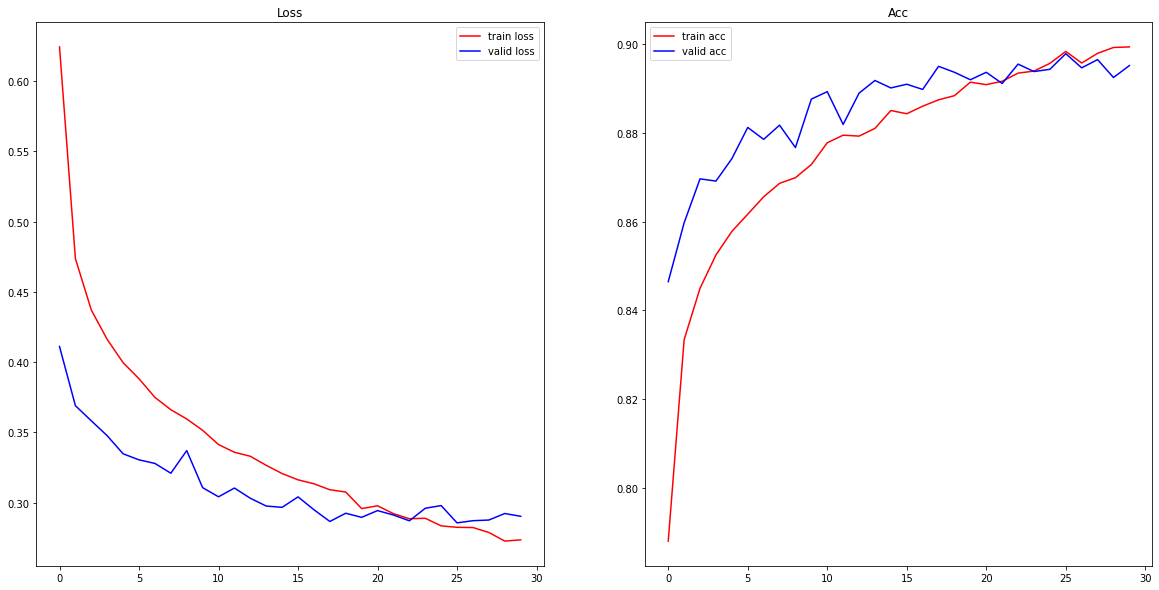

In [ ]:
#dropout+batchnomal
trainer = Trainer(model_class=LionMNISTDropoutBNClassifier, loaders=loaders["fmnist"], n_class=10, opt="adam", lr=0.001, device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()